# Projet de probabilité 

## Guillaume Rouy & Inès Fontaine

Nous avons ajouté nos réponses au notebook constitué du travail de l'an dernier.

# Enoncé du problème (Partie 1)

L'objectif de ce projet est d'estimer la longueur de câble sous-marin nécessaire pour relier deux côtes $A$ et $B$  en utilisant des simulations conditionnelles.


Le câble reposera sur le fond marin dont la profondeur est inconnue.
Le segment $[AB]$ est discrétisé par une séquence de (N+1) points. On pose $x_0=A$ et pour $i=1,\dots,N$, $$x_i=x_0+i\Delta$$ où $$\Delta = \frac{AB}{N}$$ de telle sorte que $x_N=B$.
On note $z(x)$ la profondeur du fond marin au point $x$ de telle sorte 
qu'on pourra estimer la longueur totale de câble nécessaire par la somme 
des longueurs sur les segments de la discrétisation :

$$l=\sum_{i=1}^N\sqrt{\Delta^2+(z(x_i)-z(x_{i-1}))^2}.$$

Enfin, notons que l'on dispose d'un ensemble de $n$ observations de la 
profondeur que l'on supposera situées sur des points de discrétisation $z(x_{j_1}),\dots,z(x_{j_n})$.


On adopte un modèle probabiliste pour la profondeur. On suppose que le vecteur des 
profondeurs sur les points de discrétisation 
$\mathbf{z}=(z(x_0),\dots,z(x_N))$ est la réalisation
d'un vecteur aléatoire gaussien $\mathbf{Z}=(Z(x_0),\dots,Z(x_N))$ 
dont le vecteur d'espérance ne contient qu'une seule valeur $\mu$ 
répétée $N+1$ fois et dont la matrice de covariance $\Sigma$ a pour termes $\sigma_{ij}$
définis par $\sigma_{ij}=C(|x_i-x_j|)$ où $C$ est une
fonction décroissante, traduisant le fait que deux points 
géographiquement proches ont tendance à avoir des profondeurs plus similaires que deux points éloignés.

On supposera que la matrice de covariance ainsi 
générée est définie-positive (en fait, $C$ sera choisie parmi les fonctions qui, 
appliquées aux termes d'une matrice de distance, produisent des matrices définie-positives). 

Si on note $L$ la variable aléatoire donnant la longueur de cable nécessaire : 
$$L=\sum_{i=1}^N\sqrt{\Delta^2+(Z(x_i)-Z(x_{i-1}))^2},$$
un bon estimateur de $L$ est fourni par l'espérance conditionnelle 

$$L^\star=E[L|Z(x_{j_1})=z(x_{j_1}),\dots,Z(x_{j_n})=z(x_{j_n})].$$
                                                                              
Cependant, cette quantité est difficilement accessible par le calcul. 
On va donc avoir recours à des
simulations conditionnelles. C'est-à-dire que l'on va simuler 
un nombre $K$ de réalités (disons des réalisations du modèle 
probabiliste choisi), et sur chacune d'entre elle, 
la quantité de câble nécessaire sera évaluée. 
On disposera ainsi d'un échantillon $l_{(1)},\dots,l_{(K)}$ de 
longueures simulées. Puis on approchera l'espérance conditionnelle  par 
$$L^\star=\frac1{K}\sum_{k=1}^K l_{(k)}.$$

L'objectif de ce projet est donc d'écrire un code permettant 
d'effectuer cette simulation conditionnelle, puis de l'appliquer 
au jeu de données fourni et d'en déduire une estimation de la longueur de câble nécessaire.

## Questions théoriques

1. Quel théorème du cours nous autorise-t-il à estimer l'espérance conditionnelle par la moyenne empirique de simulations conditionnelles ?

*la loi forte des grands nombres, cf [Proba IV p.16](https://boisgera.github.io/CDIS/output/Probabilit%C3%A9%20IV.pdf), en vérifiant que $L$ est bien intégrable*

2. Rappeler la loi conditionnelle du vecteur des composantes de $\mathbf{Z}$ correspondant aux points de discrétisation
sans observation, connaissant les valeurs prises par les composantes aux sites d'observation.

*cf. [Proba III p.18](https://boisgera.github.io/CDIS/output/Probabilit%C3%A9%20III.pdf),*

3. Si $\mathbf{Y}=(Y_1,\dots,Y_p)$ est un vecteur de composantes gaussiennes indépendantes, toutes d'espérance nulle et de variance 1, 
quelle est la loi du vecteur $\mathbf{Z}=m+R\mathbf{Y}$ où $R$ est une matrice $p\times p$ et $m$ est un vecteur de taille $p$ ?

*cf. [Proba V p.12](https://cloud.mines-paristech.fr/index.php/s/GLDwtTAMOJCYk3i/download)*

4. En déduire un algorithme de simulation conditionnelle.

*Appliquer l'algorithme de la q.3 à la loi conditionnelle (on calculera en particulier l'espérance conditionnelle de $\mathbf{Z}$ sachant les données et la décomposition de Cholesky de la matrice de covariance conditionnelle sachant les données).*

## Données du problème
Conventionnellement, $A$ est l'origine, $B=500$, $N=100$.

Les données $$\begin{array}{c|r}i & z(x_i)\\
\hline
0 & 0\\
20 & -4\\
40 & -12.8\\
60 & -1\\
80 & -6.5\\
100 & 0\end{array}$$

L'espérance de chaque composante du vecteur aléatoire $\mathbf{Z}$ est donnée par $\mu=-5.$

La fonction $C$ est définie par $$C(h)=\sigma^2 e^{-|h|/a},$$

où $|h|$ correspond à la distance entre deux points, $a=50$ et $\sigma^2=12$.


## Implémentation

### Préambule

In [1]:
#Chargement de dépendances

import numpy as np
import matplotlib.pyplot as plt

#Discrétisation
A=0
B=500
N=101 #Nombre de points de discrétisation
Delta = (B-A)/(N-1)
discretization_indexes = np.arange(N)
discretization = discretization_indexes*Delta
#Paramètres du modèle

mu=-5
a = 50
sigma2 = 12

#Données

observation_indexes = [0,20,40,60,80,100]
depth = np.array([0,-4,-12.8,-1,-6.5,0])

#Indices des composantes correspondant aux observations et aux componsantes non observées

unknown_indexes=list(set(discretization_indexes)-set(observation_indexes))


### Questions

1. Ecrire une fonction qui prend en argument la distance entre les points, le paramètre $a$, et le paramètre $\sigma^2$, et qui retourne la covariance entre deux points.
On pourra fournir une matrice de distance à cette fonction. Dans ce cas, la fonction renverra la matrice de covariance.

In [2]:
#Fonction C

def Covexp(dist,rangeval,sigmaval):
    return sigmaval * np.exp(-dist/rangeval)


2. Calculer la matrice de distance.

In [3]:
distmat=abs(np.subtract.outer(discretization,discretization))

3. Calculer la matrice de covariance du vecteur $\mathbf{Z}=(Z(x_0),\dots,Z(x_N))$.

In [4]:
Sigma=Covexp(distmat,a,sigma2)

4. Extraire les 3 matrices de covariance suivantes :

 * entre les observations

 * entre les observations et les inconnues

 * entre les inconnues


In [5]:
SigmaObs = Sigma[observation_indexes,:][:,observation_indexes]
SigmaObsUnknown = Sigma[observation_indexes,:][:,unknown_indexes]
SigmaUnknown = Sigma[unknown_indexes,:][:,unknown_indexes]

5. Calculer l'espérance conditionnelle des composantes non observées connaissant les observations et la représenter avec les données.

In [6]:
invSigma = np.linalg.inv(SigmaObs) 
Ec= mu+np.matmul(np.transpose(SigmaObsUnknown),np.matmul(np.linalg.inv(SigmaObs),depth-mu))

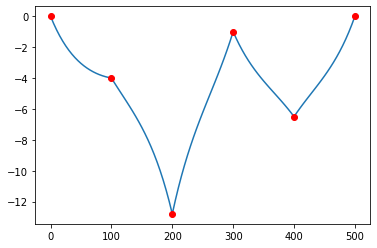

In [7]:
allval1 = np.zeros(N)
allval1[unknown_indexes]=Ec
allval1[observation_indexes]=depth
plt.plot(discretization,allval1)
plt.plot(discretization[observation_indexes], depth, 'ro')
plt.show()

6. Calculer la matrice de variance conditionnelle et tracer sa diagonale (variance conditionnelle) en fonction de la position. Commenter.

In [8]:
SigmaCond = SigmaUnknown - np.matmul(np.transpose(SigmaObsUnknown),np.matmul(np.linalg.inv(SigmaObs),SigmaObsUnknown))

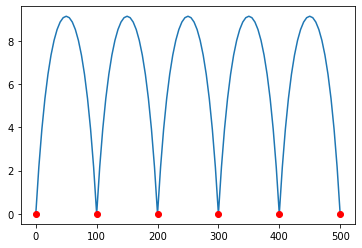

In [9]:
allval2 = np.zeros(N)
allval2[unknown_indexes]=np.diag(SigmaCond)
plt.plot(discretization,allval2)
plt.plot(discretization[observation_indexes], np.zeros(np.shape(observation_indexes)[0]), 'ro')
plt.show()

*On voit ici que la variance est nulle aux points de données (puisque la valeur est fixée) puis qu'elle augmente lorsqu'on s'éloigne des données*

7. Effectuer une simulation conditionnelle. Sur un même graphique, tracer la simulation ainsi que les données et l'espérance conditionnelle. Commenter.

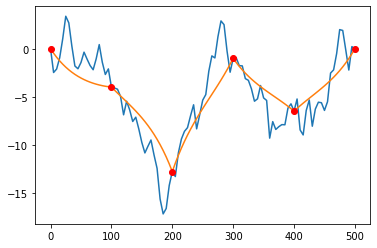

In [10]:
Cholesky = np.linalg.cholesky(SigmaCond)
x = np.random.normal(0,1,np.shape(unknown_indexes)[0])
simu = Ec + np.matmul(Cholesky,x)

allval3 = np.zeros(N)
allval3[unknown_indexes]=simu
allval3[observation_indexes]=depth
plt.plot(discretization,allval3)
plt.plot(discretization,allval1)
plt.plot(discretization[observation_indexes], depth, 'ro')
plt.show()

*l'espérance conditionnelle est lisse car c'est la fonction des données qui minimise la variance ; la simulation conditionnelle reproduit les fluctuations du modèle et donc l'aspect du fond marin*

8. Ecrire une fonction qui calcule la longueur du câble en fonction du vecteur des profondeurs et du pas de discrétisation.

In [11]:
def length(z,delta):
    return sum(np.sqrt(Delta**2+(z[1:N]-z[0:-1])**2))

9. Utiliser cette fonction pour calculer la longueur du câble à partir de 100 simulations. Comparer l'espérance conditionnelle (estimée) de la longueur avec la longueur de l'espérance conditionnelle.

In [12]:
K=10000
result = np.zeros(K)
for i in range(K):
    x=np.random.normal(0,1,np.shape(unknown_indexes)[0])
    allval3[unknown_indexes]=Ec + np.matmul(Cholesky,x)
    result[i]=length(allval3,Delta)


In [13]:
sum(result)/K

522.3977819225242

In [14]:
length(allval1,Delta)

501.6468416918411

*On donne ici directement les résultats pour 100000 simulations (comparer la vitesse d'éxécution avec votre code pour voir l'intérêt de la vectorisation).*

*On voit ici que la longueur donnée par l'espérance conditionnelle est bien moindre que la longueur d'une simulation conditionnelle. Ceci est dû au fait que la simulation conditionnelle va reproduire les fluctuations attendues, au contraire de l'espérance conditionnelle qui minimise la variance.*

*NB : On remarquera que c'est le seul endroit où on a utilisé une boucle dans cette correction. On aurait pu s'en passer en utilisant notamment les outils de la librairie Pandas mais le code est plus lisible ainsi.*

10. Représenter la suite $M_n$ des moyennes des longueurs de câbles en fonction du nombre de simulations. Commenter.

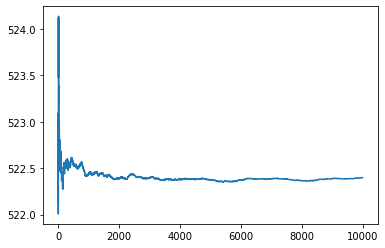

In [15]:
indice_simu = 1+np.arange(K)
plt.plot(indice_simu,np.cumsum(result)/indice_simu)
plt.show()

*Comme attendu d'après la LFGN, on observe une stabilisation de la valeur moyenne. Les variations sont imperceptibles après quelques dizaines de milliers de simulations*

11. Représenter l'histogramme des longueurs de câbles générées.

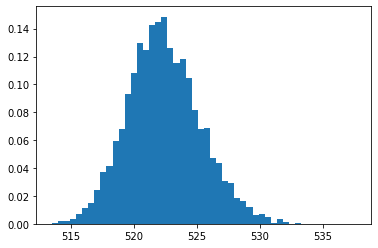

In [16]:
plt.hist(result,50,density=True)
plt.show()

*L'histogramme ressemble à une densité gaussienne, avec néanmoins une légère dissymétrie (plus de valeurs fortes).*

12. Donner un intervalle de confiance à 95% de la longueur du câble par 2 méthodes différentes. Commenter.

*1ère méthode : par approximation gaussienne. L'histogramme précédent suggère qu'une loi gaussienne peut bien représenter la loi conditionnelle de la longueur du cable. On obtient un intervalle de confiance en calculant la moyenne (milieu de l'intervalle) et l'écart type de l'échantillon de longueurs de câble puis en appliquant la formule du cours.*

In [17]:
Ln = sum(result)/K
sigman = np.std(result)
[Ln - sigman*1.96,Ln + sigman*1.96]

[516.7375863052188, 528.0579775398297]

*2e méthode : on extrait les quantiles à 2.5% et 97.5% de l'échantillon, c'est-à-dire les valeurs $x_\alpha$ pour $\alpha \in \{0.025 ; 0.975\}$telles que* $$\mathbb{P}(L<x_\alpha) \approx \frac{1}{n}\sum_{i=1}^N 1_{\{L_i<x_\alpha\}}$$

In [18]:
np.quantile(result,[0.025,0.975])

array([517.07296252, 528.49549723])

*ATTENTION : ici l'utilisation du TCL tel qu'exposé au début du chapitre 5 fournissait un intervalle de confiance de l'**espérance de la longueur de câble** et non de la **longueur de câble** (erreur fréquente).*

*On voit par ailleurs que la 2e méthode est plus précise car elle est basée directement sur la loi empirique de l'échantillon*

13. Donner une estimation de la probabilité que la longueur du câble dépasse 525 m.

In [19]:
np.mean(result>525)

0.1796

14. Reprendre les questions précédentes avec 1000, 10000 puis 100000 simulations. Commenter

*cf. le commentaire de la question 10. On observe une stabilisation progressive des estimateurs des différentes quantités calculées : moyennes, quantiles, probabilité de dépassement de seuil.*

# Enoncé 2021 (Partie 2)

Nous nous plaçons dans le même cadre que ci-dessus. Nous tenons pour acquis les résultats précédents et allons maintenant approfondir l'analyse.

# Valeurs positives

# Question 1

In [20]:
def genallval3():
    allval3 = np.zeros(N)
    allval3[observation_indexes]=depth
    Cholesky = np.linalg.cholesky(SigmaCond)
    tt = np.array([False])
    x = np.random.normal(0,1,np.shape(unknown_indexes)[0])
    simu = Ec + np.matmul(Cholesky,x)

    it =0

    while not tt.all() :
        x = np.random.normal(0,1,np.shape(unknown_indexes)[0])
        simu = Ec + np.matmul(Cholesky,x)
        tt = np.array([e<0 for e in simu])
        
        it+=1
        
    allval3[unknown_indexes] = simu

    return allval3,it

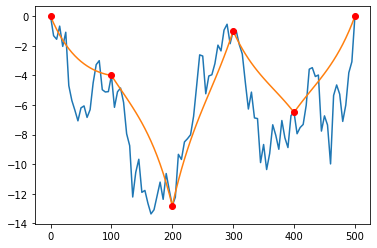

In [21]:
allval3 = genallval3()[0]
plt.plot(discretization,allval3)
plt.plot(discretization,allval1)
plt.plot(discretization[observation_indexes], depth, 'ro')
plt.show()

## Question 2

*Durée de la méthode du rejet : environ 25 secondes*

RESULTATS :

Longueur du cable moyenne (Partie 2-Q1) : 521.7892758892285
Longueur du cable moyenne (Partie 1) : 522.3977819225242



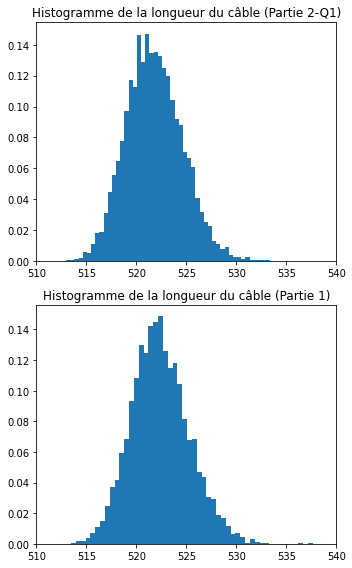


Intervalle de confiance à 95% (Partie 2-Q1) = [516.63498707 527.53772158]
Intervalle de confiance à 95% (Partie 1) = [517.07296252 528.49549723]

Probabilité de dépasser 525m (Partie 2-Q1) = 0.1323
Probabilité de dépasser 525m (Partie 1) = 0.1796


In [22]:
# Histogramme 
K=10000
resultbis = np.zeros(K)
it_sum = 0
for i in range(K):
    # if i%1000==0:
    #     print(f'{int(100*i/K)}% des tirages réalisés.')
    res, it = genallval3()
    resultbis[i]=length(res,Delta)
    it_sum += it

# print(f'100% des tirages réalisés.\n')
print(f'RESULTATS :\n')

print(f'Longueur du cable moyenne (Partie 2-Q1) : {sum(resultbis)/K}')
print(f'Longueur du cable moyenne (Partie 1) : {sum(result)/K}')
print(f'')

fig, axes = plt.subplots(2, figsize =(5, 8))
axes[0].hist(resultbis,50,density=True)
axes[1].hist(result,50,density=True)
axes[0].set_title('Histogramme de la longueur du câble (Partie 2-Q1)')
axes[1].set_title('Histogramme de la longueur du câble (Partie 1)')
axes[0].set_xlim(510, 540)
axes[1].set_xlim(510, 540)
plt.tight_layout()
plt.show()
print(f'')

# Intervalle de confiance
print(f'Intervalle de confiance à 95% (Partie 2-Q1) = {np.quantile(resultbis,[0.025,0.975])}')
print(f'Intervalle de confiance à 95% (Partie 1) = {np.quantile(result,[0.025,0.975])}')
print(f'')

# Probabalité de dépassement du seuil
print(f'Probabilité de dépasser 525m (Partie 2-Q1) = {np.mean(resultbis>525)}')
print(f'Probabilité de dépasser 525m (Partie 1) = {np.mean(result>525)}')

La valeur moyenne de la longueur du cable était de $522 m$ environ, elle reste plus ou moins inchangée à $521,8 m$ (légèrement plus basse car on a supprimé des valeurs hautes).

L'histogramme de la longueur du câble est n'est pas très différent de celui tracé avec l'ancienne méthode. 

On remarque que le nouvel intervalle de confiance reste globalement inchangé, mais que la probabilité de dépassement est également plus faible (on a retiré des valeurs hautes).

Le taux de rejet correspond ici à la probabilité d'avoir un vecteur $simu$ totalement positif. On le calcule à partir du nombre d'itérations réalisées par la méthode du rejet. Ici, le taux de rejet est extrêmement élevé : 96%.

In [23]:
print(f'Taux de rejet : {1-1/(it_sum/K)}')

Taux de rejet : 0.9616479124958771


# Approche Bayésienne

## Question 3

Pour tout $z_{OBS}$ et tout $m$, la densité jointe du vecteur $(\mathbf{Z}_{\text{OBS}},\mu)$ s'écrit :
$$
f_{\mathbf{Z}_{\text{OBS}},\mu}(z_{obs},m) = f_{\mathbf{Z}_{\text{OBS}} | \mu = m}(z_{obs}) f_{\mu}(m) =f_{\mu | \mathbf{Z}_{\text{OBS}} = z_{obs}}(m) f_{\mathbf{Z}_{\text{OBS}}}(z_{obs})
$$


$$
$$


On sait que, pour tout $z_{OBS}$, la densité conditionnelle de $\mathbf{Z}_{\text{OBS}} | \mu = m$ s'écrit, avec $M = m \mathbf{1}$ :
$$
f_{\mathbf{Z}_{\text{OBS}} | \mu = m}(z_{obs}) = \frac{1}{(2\pi)^3 \sqrt{\det(C_{OBS}})} \exp\Big(-\frac{1}{2}(z_{obs} - M)^{t}C_{OBS}^{-1}(z_{obs}-M)\Big)
$$

Or, comme on a supposé que $\mu \sim \mathcal{N}(-5,4)$, la variable $\mu$ admet une densité gaussienne définie pour tout $m$ :
$$
f_{\mu}(m) = \frac{1}{2\sqrt{2\pi}} \exp(-\frac{(m+5)^{2}}{8})
$$

D'où le produit :
$$
f_{\mathbf{Z}_{\text{OBS}},\mu}(z_{obs},m) = \frac{1}{(2\pi)^3 \sqrt{\det(C_{OBS}})} \exp\Big(-\frac{1}{2}(z_{obs} - M)^{t}C_{OBS}^{-1}(z_{obs}-M)\Big) \times \frac{1}{2\sqrt{2\pi}} \exp(-\frac{(m+5)^{2}}{8})
$$


On calcule alors la quantité :
$$ 
-2 \ln(f_{\mathbf{Z}_{\text{OBS}},\mu}(z_{obs},m)) = -2 \ln(\frac{1}{2(2\pi)^{\frac{7}{2}} \sqrt{\det(C_{OBS})}}) + (z_{obs} - M)^{t}C_{OBS}^{-1}(z_{obs}-M) + \frac{(m+5)^2}{4}
$$

Ce qui donne :
$$
-2 \ln(f_{\mathbf{Z}_{\text{OBS}},\mu}(z_{obs},m)) = \ln(4(2\pi)^7 \det(C_{OBS})) + z_{obs}^{t}C_{OBS}^{-1}z_{obs} - M^{t}C_{OBS}^{-1}z_{obs} -z_{obs}^{t}C_{OBS}^{-1}M +M^{t}C_{OBS}^{-1}M + \frac{(m+5)^2}{4}
$$

Et :
$$
- 2 \ln(f_{\mathbf{Z}_{\text{OBS}},\mu}(z_{obs},m)) = \ln(4(2\pi)^7 \det(C_{OBS})) + m^2(\mathbf{1}^tC_{OBS}^{-1}\mathbf{1}+\frac{1}{4}) + m(\frac{5}{2}-\mathbf{1}^tC_{OBS}^{-1}z_{OBS} - z_{OBS}^{t}C_{OBS}^{-1}\mathbf{1}) + z_{obs}^{t}C_{OBS}^{-1}z_{obs} + \frac{25}{4}
$$

Or, on a l'égalité : $\mathbf{1}^tC_{OBS}^{-1}z_{OBS} = z_{OBS}^{t}C_{OBS}^{-1}\mathbf{1}$ car les deux termes sont scalaires transposés l'un de l'autre. Ainsi :
$$
-2 \ln(f_{\mathbf{Z}_{\text{OBS}},\mu}(z_{obs},m)) = \ln(4(2\pi)^7 \det(C_{OBS})) + m^2(\mathbf{1}^tC_{OBS}^{-1}\mathbf{1}+\frac{1}{4}) + 2m(\frac{5}{4}- \mathbf{1}^tC_{OBS}^{-1}z_{OBS}) + z_{obs}^{t}C_{OBS}^{-1}z_{obs} + \frac{25}{4}
$$

On reconnait des termes :
$$
-2 \ln(f_{\mathbf{Z}_{\text{OBS}},\mu}(z_{obs},m)) = \ln(4(2\pi)^7 \det(C_{OBS})) + \frac{m^2}{\widehat{\sigma}^2} - 2m\frac{\widehat{\mu}}{\widehat{\sigma}^2} + z_{obs}^{t}C_{OBS}^{-1}z_{obs} + \frac{25}{4}
$$

Ce qui permet de forcer une factorisation de la forme :
$$
-2 \ln(f_{\mathbf{Z}_{\text{OBS}},\mu}(z_{obs},m)) = \ln(4(2\pi)^7 \det(C_{OBS})) + \frac{(m-\widehat{\mu})^2}{\widehat{\sigma}^2} - \frac{\widehat{\mu}^2}{\widehat{\sigma}^2} + z_{obs}^{t}C_{OBS}^{-1}z_{obs} + \frac{25}{4}
$$

Et ainsi on a séparé deux grands termes :
$$
-2 \ln(f_{\mathbf{Z}_{\text{OBS}},\mu}(z_{obs},m)) = \ln(4(2\pi)^7 \det(C_{OBS})) + \Big( \frac{(m-\widehat{\mu})^2}{\widehat{\sigma}^2} \Big) + \Big( - \frac{(\mathbf{1}^t C_{\text{OBS}}^{-1} \mathbf{z}_{\text{OBS}} - \frac{5}{4} )^2}{\mathbf{1}^t C_{\text{OBS}}^{-1} \mathbf{1} + \frac1{4}} + z_{obs}^{t}C_{OBS}^{-1}z_{obs} + \frac{25}{4} \Big)
$$

C'est à dire, finalement :

$$
f_{\mathbf{Z}_{\text{OBS}},\mu}(z_{obs},m) = K \exp ( -\frac{(m-\widehat{\mu})^2}{2\widehat{\sigma}^2}) \times \exp \Big( \frac{1}{2} \frac{(\mathbf{1}^t C_{\text{OBS}}^{-1} \mathbf{z}_{\text{OBS}} - \frac{5}{4} )^2}{\mathbf{1}^t C_{\text{OBS}}^{-1} \mathbf{1} + \frac{1}{4}} - \frac{1}{2} z_{obs}^{t}C_{OBS}^{-1}z_{obs} - \frac{25}{8}\Big)
$$

On a donc trouvé deux fonctions :
$$
g(m)=\exp ( -\frac{(m-\widehat{\mu})^2}{2\widehat{\sigma}^2})
$$

$$
h(z_{OBS})= \exp \Big( \frac{1}{2} \frac{(\mathbf{1}^t C_{\text{OBS}}^{-1} \mathbf{z}_{\text{OBS}} - \frac{5}{4} )^2}{\mathbf{1}^t C_{\text{OBS}}^{-1} \mathbf{1} + \frac{1}{4}} - \frac{1}{2} z_{obs}^{t}C_{OBS}^{-1}z_{obs} - \frac{25}{8}\Big)
$$

Ce qui donne :
$$
f_{\mathbf{Z}_{\text{OBS}},\mu}(z_{obs},m) = K g(m) h(z_{OBS})
$$

Et cela permet de conclure que $g(m) \propto f_{\mu | \mathbf{Z}_{\text{OBS}} = z_{obs}}(m) $ et que $ h(z_{OBS}) \propto f_{\mathbf{Z}_{\text{OBS}}}(z_{obs}) $, et ainsi nécessairement :
$$
f_{\mu | \mathbf{Z}_{\text{OBS}} = z_{obs}}(m) = \frac{1}{\widehat{\sigma}\sqrt{2\pi}} \exp\big(-\frac{(m-\widehat{\mu})^{2}}{2\widehat{\sigma}^2}\big)
$$

D'où le résultat demandé.

## Question 4

D'après la formule de la densité conditionnelle :
$$
f_{X,Y|Z = z}(x, y) = \frac{f_{X,Y,Z}(x, y, z)}{f_Z(z)} = \frac{f_{X |Y = y,Z=z}(x)f_{Y, Z}(y, z)}{f_Z(z)} = \frac{f_{X |Y = y,Z=z}(x)f_{Y|Z=z}(y)f_Z(z)}{f_Z(z)} = f_{X |Y = y,Z=z}(x)f_{Y|Z=z}(y)

## Question 5

En appliquant le résultat de la question précédente avec $X = Z_{UNK}$, $Y = \mu $ et $Z = Z_{OBS}$, on obtient :

$$
f_{(\mathbf{Z}_{\text{UNK}},\mu) | \mathbf{Z}_{\text{OBS}} = \mathbf{z}_{\text{OBS}}}(z_{UNK}, \mu^\star) = f_{\mathbf{Z}_{\text{UNK}}| \mu = \mu^\star, \mathbf{Z}_{\text{OBS}} = \mathbf{z}_{\text{OBS}}}(z_{UNK}) f_{\mu | \mathbf{Z}_{\text{OBS}} = \mathbf{z}_{\text{OBS}}}(\mu^\star)
$$
Avec:
$$
f_{\mathbf{Z}_{\text{UNK}}| \mu = \mu^\star, \mathbf{Z}_{\text{OBS}} = \mathbf{z}_{\text{OBS}}}(z_{UNK}) = f_{\mathbf{Z}_{\text{UNK}}| \mathbf{Z}_{\text{OBS}} = \mathbf{z}_{\text{OBS}}}(z_{UNK})
$$
Or d'après probabilité III, on a :
$$
f_{\mathbf{Z}_{\text{UNK}}| \mathbf{Z}_{\text{OBS}} = \mathbf{z}_{\text{OBS}}}(z_{UNK}) = \frac{1}{(2\pi)^{\frac{N-7}{2}} \sqrt{det(C S_{Z_{UNK}})}}exp\Big(-\frac{1}{2}(z_{UNK}-\psi(z_{OBS}))^t C S_{Z_{UNK}}^{-1}(Z_{UNK}-\psi(z_{OBS})) \Big)
$$
Où:
$$
C = \begin{pmatrix}
\Sigma_{UNK} & \Sigma_{UNK,OBS} \\
\Sigma_{OBS,UNK}& \Sigma_{OBS}
\end{pmatrix}
$$
$$
CS_{Z_{UNK}} = \Sigma_{UNK} - \Sigma_{UNK,OBS}\Sigma_{OBS}^{-1}\Sigma_{OBS,UNK}
$$
$$
\psi(z) = \mathbb{E}(Z_{UNK}|Z_{OBS})


# Simulation 
## Question 6

In [24]:
vecteur1 = np.array([[1], [1], [1], [1], [1], [1]])
sigmachapcarré = (np.dot(np.transpose(vecteur1), np.dot(np.linalg.inv(SigmaObs), vecteur1))[0][0] + 1/4)**(-1)
muchap = (sigmachapcarré*(np.matmul(np.transpose(vecteur1), np.matmul(np.linalg.inv(SigmaObs), depth)) - 5/4))[0]

print(f'Variance de la loi normale calculée : {sigmachapcarré}')
print(f'Moyenne de la loi normale calculée : {muchap}')


Variance de la loi normale calculée : 1.5368909974762894
Moyenne de la loi normale calculée : -4.291350330933772


## Question 7

In [25]:
K=10000
resultmu = np.zeros(K)
for i in range(K):
    mu = np.random.normal(muchap,sigmachapcarré,1)
    resultmu[i] = mu

print('Moyenne expérimentale : ', sum(resultmu)/K)
print('Probabilité que mu soit positive : ', np.mean(resultmu > 0))

Moyenne expérimentale :  -4.2913812696347025
Probabilité que mu soit positive :  0.0022


On remarque que la probabilité que $\mu| \mathbf{Z}_{\text{OBS}} = \mathbf{z}_{\text{OBS}} > 0$ est très faible : une méthode du rejet est donc adaptée pour simuler des valeurs uniquement négatives de $\mu| \mathbf{Z}_{\text{OBS}} = \mathbf{z}_{\text{OBS}}$.

In [26]:
def simu_mu(moy, var):
    mu = 1
    while mu>0:
        mu = np.random.normal(moy,var,1)
    return mu

print(f'Un tirage de mu nécessairement négatif : ', simu_mu(muchap, sigmachapcarré)[0])

Un tirage de mu nécessairement négatif :  -4.083135407549765


## Question 8

In [27]:
def genallval4(moy, var):
    
    allval4 = np.zeros(N)
    x=np.random.normal(0,1,np.shape(unknown_indexes)[0])
    Ec = simu_mu(moy, var)[0] + np.matmul(np.transpose(SigmaObsUnknown),np.matmul(np.linalg.inv(SigmaObs),depth-moy))
    allval4[unknown_indexes]= Ec + np.matmul(Cholesky,x)
    allval4[observation_indexes]=depth

    tt = np.array([False])
    it = 0

    while not tt.all() :
        x=np.random.normal(0,1,np.shape(unknown_indexes)[0])
        Ec = simu_mu(moy, var)[0] + np.matmul(np.transpose(SigmaObsUnknown),np.matmul(np.linalg.inv(SigmaObs),depth-moy))
        simu = Ec + np.matmul(Cholesky,x)
        tt = np.array([e<0 for e in simu])
        it += 1
    
    allval4[unknown_indexes] = simu

    return allval4,it

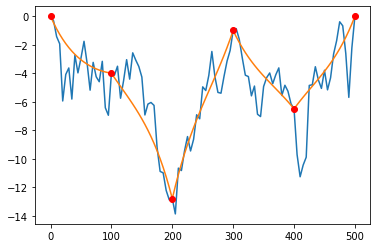

In [28]:
allval4new = genallval4(muchap, sigmachapcarré)[0]
plt.plot(discretization,allval4new)
plt.plot(discretization,allval1)
plt.plot(discretization[observation_indexes], depth, 'ro')
plt.show()

## Question 9
*Durée de la méthode du rejet : environ 20 secondes*

RESULTATS :

Convergence :



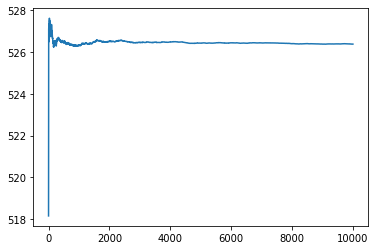

Longueur du cable moyenne (Partie 2-Q9) : 526.3877078066155
Longueur du cable moyenne (Partie 2-Q1) : 521.7892758892285
Longueur du cable moyenne (Partie 1) : 522.3977819225242



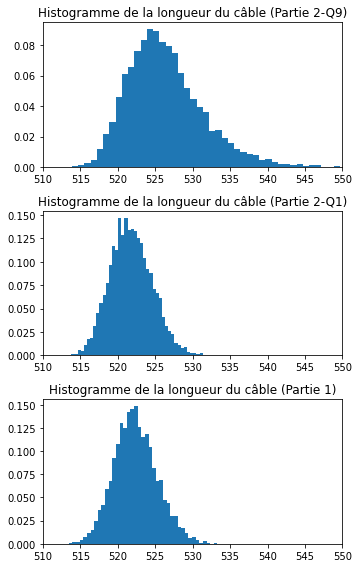


Intervalle de confiance à 95% (Partie 2-Q9) = [518.50561003 538.35312405]
Intervalle de confiance à 95% (Partie 2-Q1) = [516.63498707 527.53772158]
Intervalle de confiance à 95% (Partie 1) = [517.07296252 528.49549723]

Probabilité de dépasser 525m (Partie 2-Q9) = 0.5597
Probabilité de dépasser 525m (Partie 2-Q1) = 0.1323
Probabilité de dépasser 525m (Partie 1) = 0.1796

Taux de rejet : 0.880296863777831


In [29]:
# Histogramme 
K=10000
result4 = np.zeros(K)
partial_lengths = []
partial_averages = []
it_sum = 0

for i in range(K):
    # if i%500==0:
    #     print(f'{int(100*i/K)}% des tirages réalisés.')
    res, it = genallval4(muchap, sigmachapcarré)
    result4[i]=length(res,Delta)
    partial_lengths.append(result4[i])
    partial_averages.append(sum(partial_lengths)/(i+1))
    it_sum += it

# print(f'100% des tirages réalisés.\n')
print(f'RESULTATS :\n')

# Convergence
print('Convergence :\n')
plt.plot(range(K), partial_averages)
plt.show()

print(f'Longueur du cable moyenne (Partie 2-Q9) : {sum(result4)/K}')
print(f'Longueur du cable moyenne (Partie 2-Q1) : {sum(resultbis)/K}')
print(f'Longueur du cable moyenne (Partie 1) : {sum(result)/K}')
print(f'')

fig, axes = plt.subplots(3, figsize =(5, 8))
axes[0].hist(result4,50,density=True)
axes[1].hist(resultbis,50,density=True)
axes[2].hist(result,50,density=True)
axes[0].set_title('Histogramme de la longueur du câble (Partie 2-Q9)')
axes[1].set_title('Histogramme de la longueur du câble (Partie 2-Q1)')
axes[2].set_title('Histogramme de la longueur du câble (Partie 1)')
axes[0].set_xlim(510, 550)
axes[1].set_xlim(510, 550)
axes[2].set_xlim(510, 550)
plt.tight_layout()
plt.show()
print(f'')

# Intervalle de confiance
print(f'Intervalle de confiance à 95% (Partie 2-Q9) = {np.quantile(result4,[0.025,0.975])}')
print(f'Intervalle de confiance à 95% (Partie 2-Q1) = {np.quantile(resultbis,[0.025,0.975])}')
print(f'Intervalle de confiance à 95% (Partie 1) = {np.quantile(result,[0.025,0.975])}')
print(f'')

# Probabalité de dépassement du seuil
print(f'Probabilité de dépasser 525m (Partie 2-Q9) = {np.mean(result4>525)}')
print(f'Probabilité de dépasser 525m (Partie 2-Q1) = {np.mean(resultbis>525)}')
print(f'Probabilité de dépasser 525m (Partie 1) = {np.mean(result>525)}')
print(f'')

#Rejet
print(f'Taux de rejet : {1-1/(it_sum/K)}')

On note que l'espérance de la longueur du cable a légèrement augmenté, pour atteindre $526m$. On remarque surtout que les simulations successives réalisées ont pour conséquence d'augmenter considérablement l'incertitude sur le résultat. En effet, l'intervalle de confiance est maintenant de 20m. De plus, la probabilité de dépassement de 525m est maintenant proche de 56%, ce qui est bien plus élevé qu'à la question 1 où on avait obtenu 13%.

Cette augmentation de l'incertitude était attendue, puisqu'on a tout de même fait varier $\mu$ autour de $-5$ selon une gaussienne de variance $4$, qui est une valeur non négligeable.

On notera également que ce programme est légèrement plus rapide que celui de la question 2. Cela peut provenir du fait que tirer mu aléatoirement génère moins d'altitudes positives. En effet, le taux de rejet annoncé est moins élevé, autour de 88%.

## Question 10

En rendant les paramètres $\sigma^2$ et $a$ variables, on rend variable la covariance d'altitude entre deux points consécutifs. Cela implique qu'on va ajouter un tirage avant de tirer $\mu$, refaire les tirages successifs, et obtenir de nouveaux histogrammes. Cela va avoir pour effet d'augmenter encore les incertitudes et étaler la distribution, de la même manière que l'incertitude sur $\mu$.